# EDA

## Reading in the CSV

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
#reading the csv
ames = pd.read_csv('train.csv')

print('The dataset has {} rows and {} columns.'.format(ames.shape[0], ames.shape[1]))

The dataset has 1460 rows and 81 columns.


## Numerical EDA

In [4]:
#first look at data set
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#some descriptive statistics
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
#checking count of data types
ames.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
#sampling 10 rows
ames.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
971,972,160,RL,36.0,2268,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,173000
1265,1266,160,FV,35.0,3735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,183900
445,446,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500
410,411,20,RL,68.0,9571,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,COD,Abnorml,60000
77,78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,127000
919,920,20,RL,87.0,11029,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,176500
1101,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,119500
1206,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,107000
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
929,930,60,RL,NaN,13006,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,222000


In [8]:
#overview of column names
print(ames.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Visual EDA

## Response Variable

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


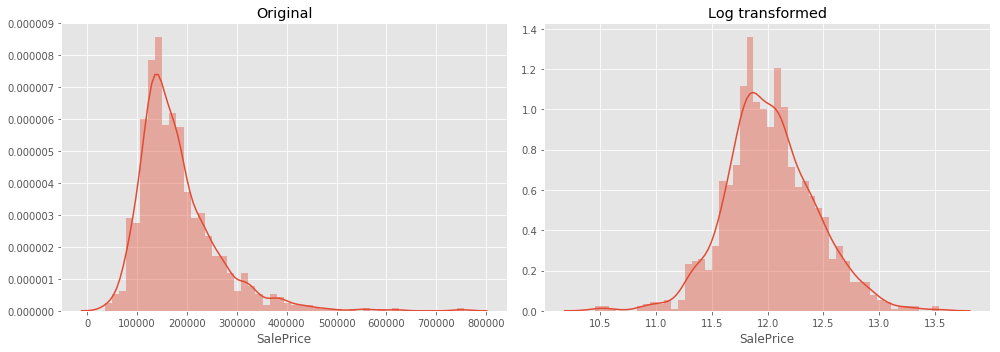

In [9]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(ames.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(ames.SalePrice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

Text(0, 0.5, 'Sample quantiles')

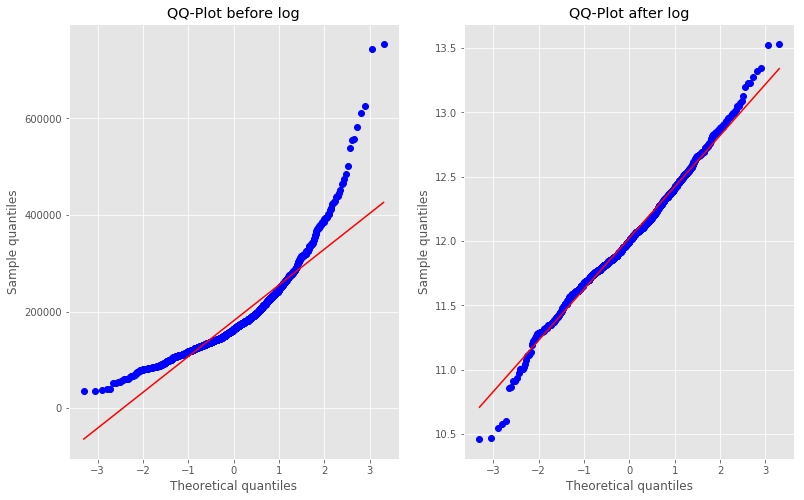

In [10]:
##QQ-Plot before log-transformation
fig = plt.figure(figsize=(13, 8))

ax1 = plt.subplot(121)
res = stats.probplot(ames['SalePrice'], plot=plt)
plt.title('QQ-Plot before log')
plt.ylabel('Sample quantiles')

ax1 = plt.subplot(122)
a = np.log1p(ames["SalePrice"])
res = stats.probplot(a, plot=plt)
plt.title('QQ-Plot after log')
plt.ylabel('Sample quantiles')

## Input Variables

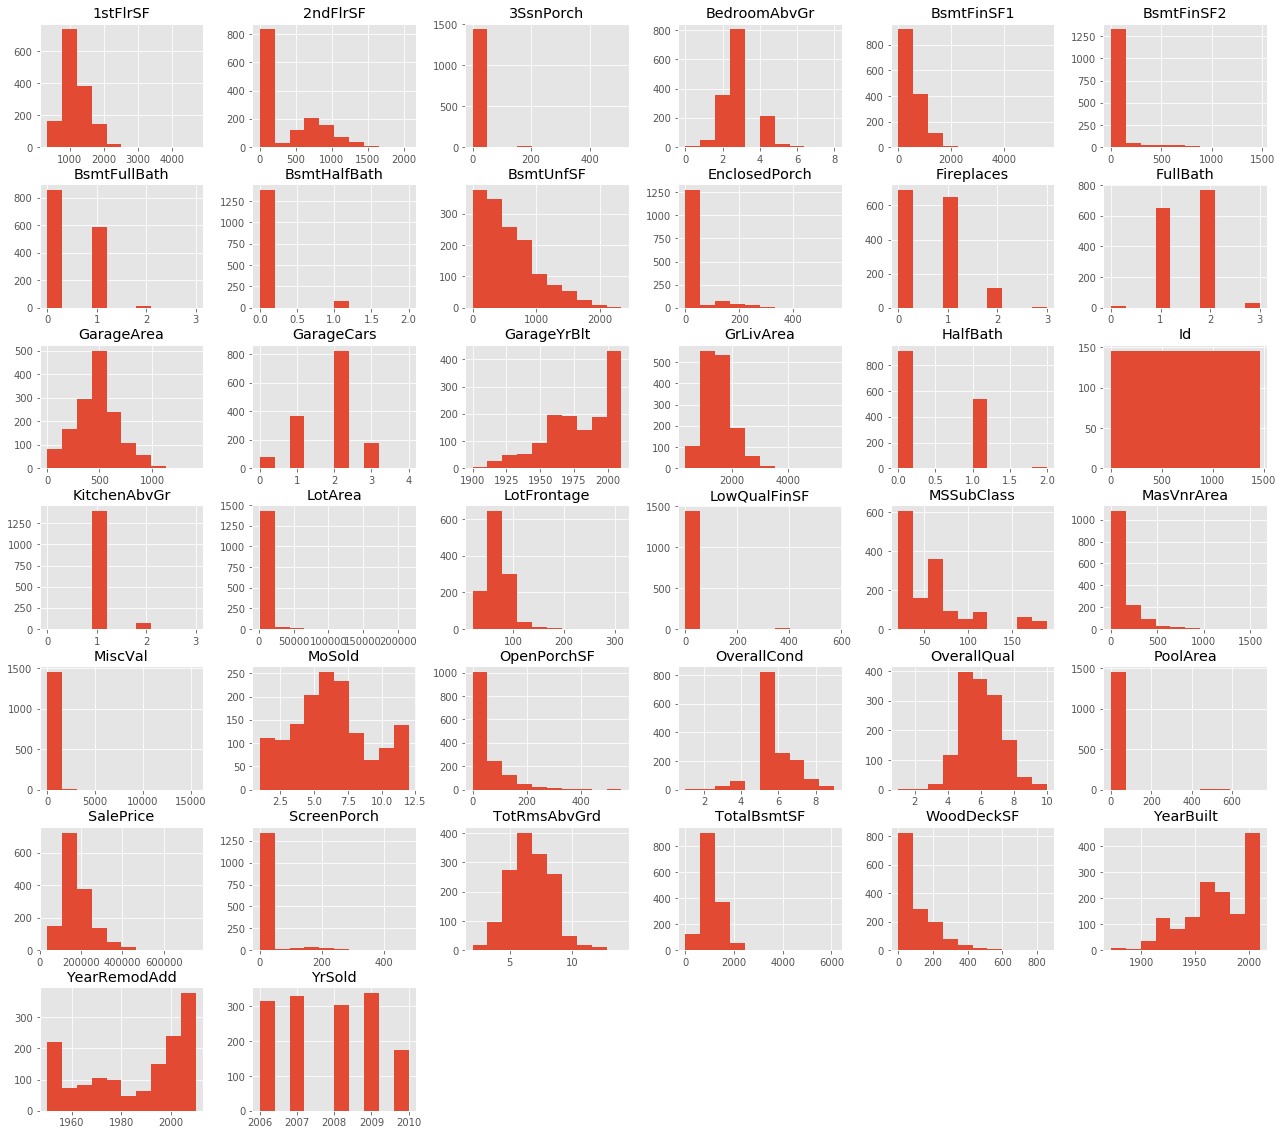

In [11]:
#Histograms
hist_overview = ames.hist(figsize=(22,20))

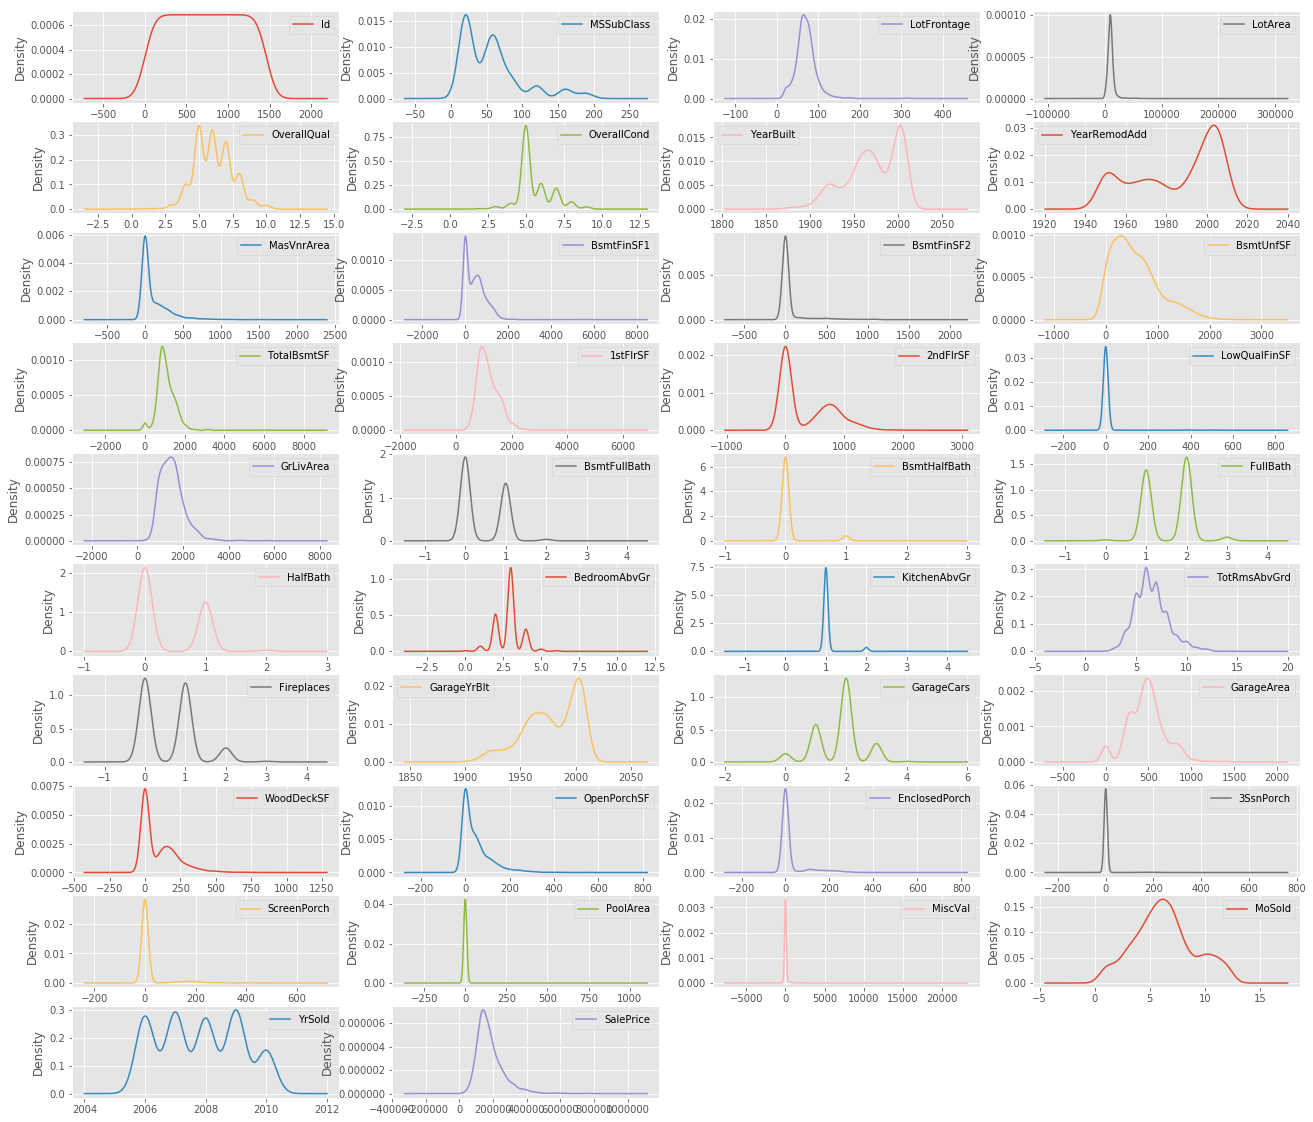

In [12]:
#Density plots
den_overview = ames.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

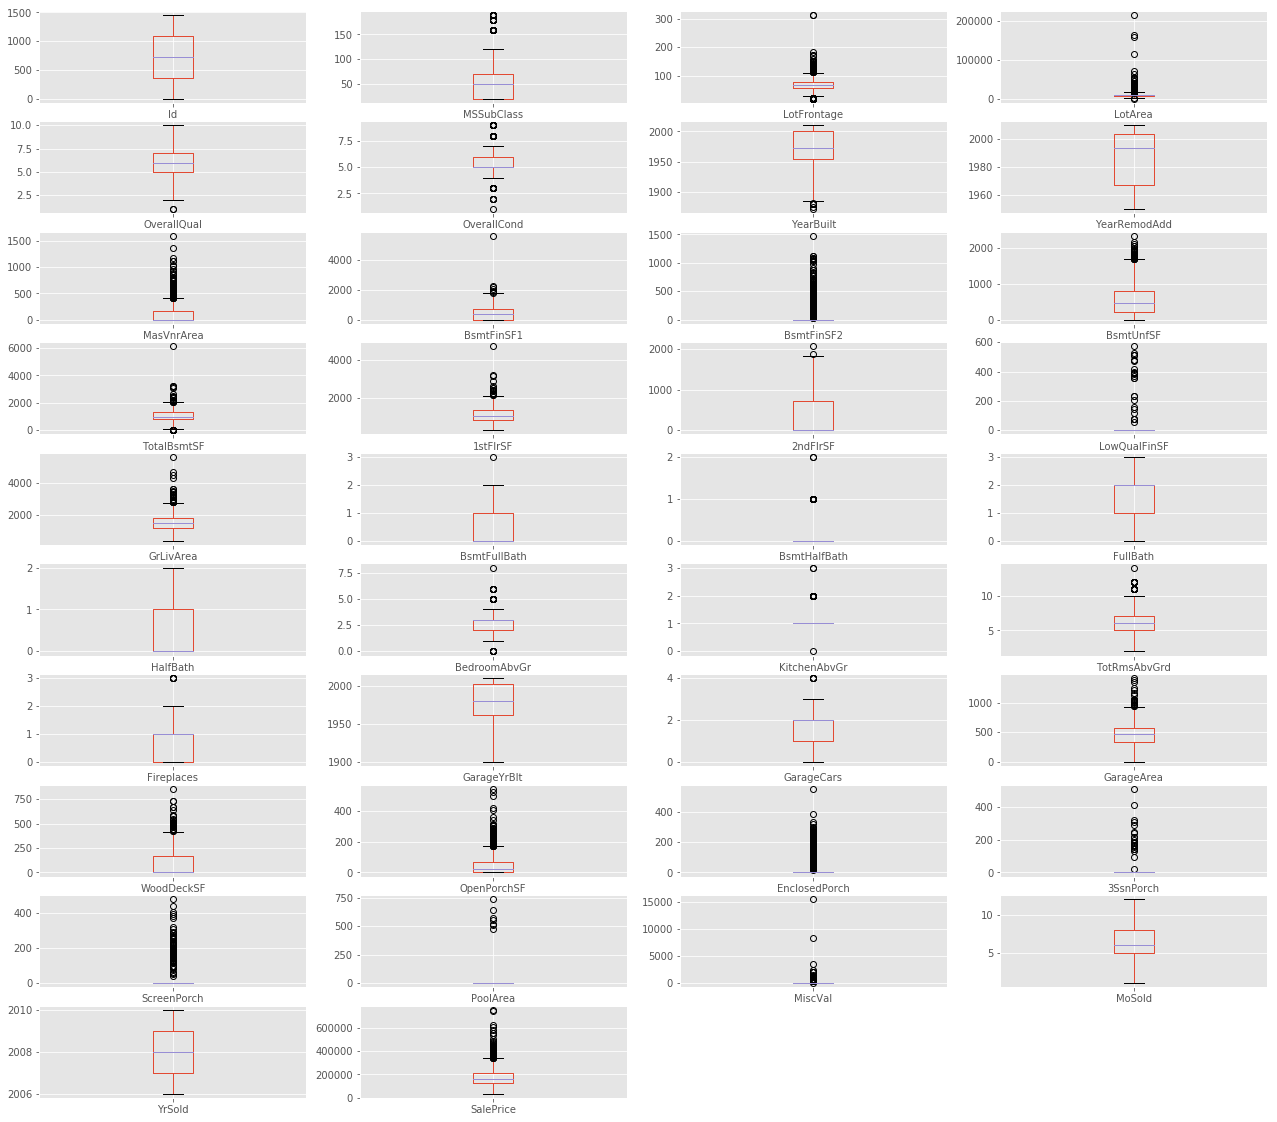

In [13]:
#Boxplots
box_overview = ames.plot(kind='box', subplots=True, layout=(10,4), sharex=False, sharey=False, figsize=(22,20))

Text(0.5, 1.0, 'Sale Price vs. Overall Quality')

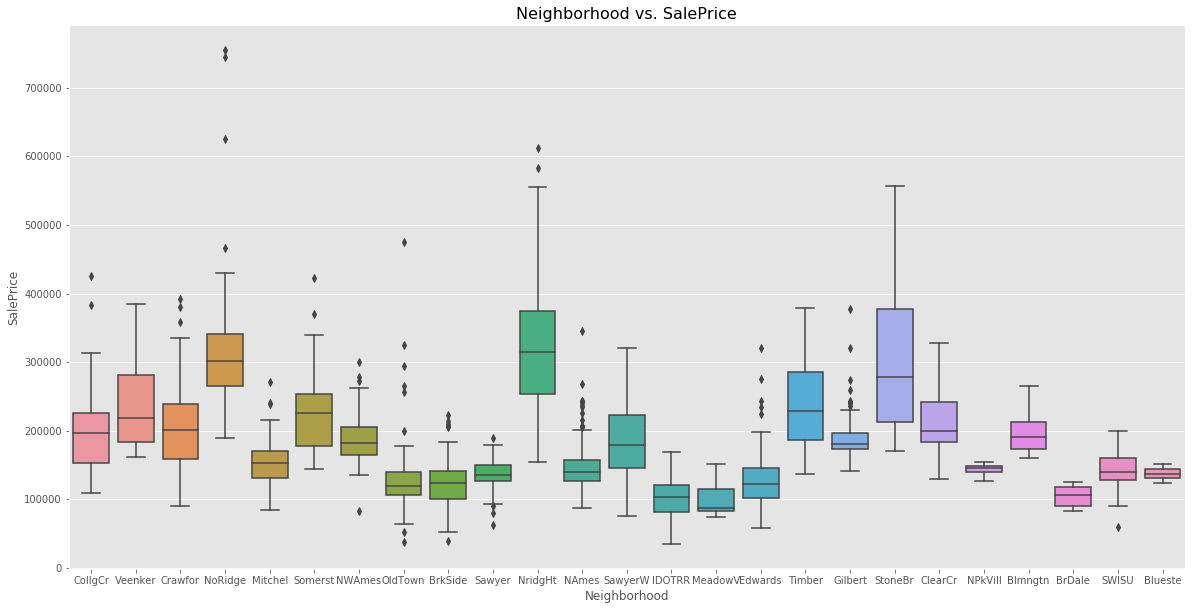

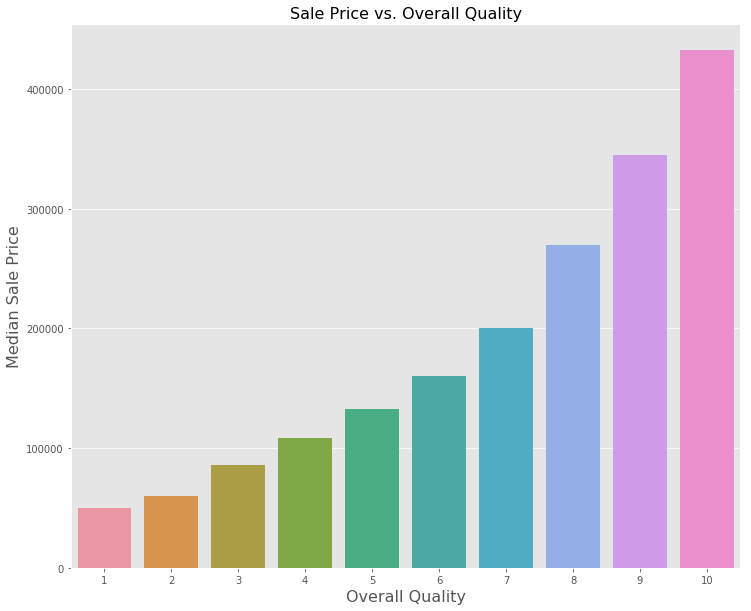

In [20]:
#Neigborhood vs. Sale Price
ames['logSalePrice'] = np.log(ames['SalePrice'])

plt.figure(figsize = (20, 10))
plt.title('Neighborhood vs. SalePrice', size=16)
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=ames)

#Overall Quality vs. Median Sale Price
quality = ames.groupby('OverallQual')['SalePrice'].agg('median').reset_index()
plt.figure(figsize=(12,10))
sns.barplot(quality['OverallQual'], quality['SalePrice'])
plt.xlabel('Overall Quality', size=16)
plt.ylabel('Median Sale Price', size=16)
plt.title('Sale Price vs. Overall Quality', size=16)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


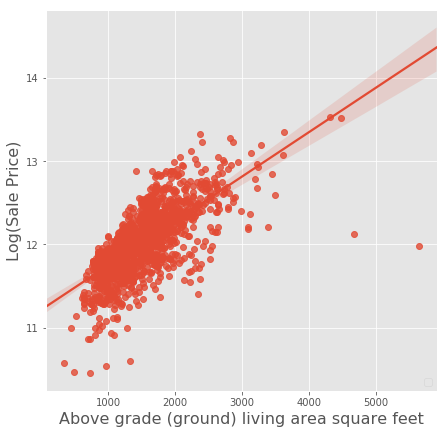

In [21]:
#Relationship between above ground living area and sale price
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x=ames['GrLivArea'], y=ames['logSalePrice'])
plt.ylabel('Log(Sale Price)', size=16)
plt.xlabel('Above grade (ground) living area square feet',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

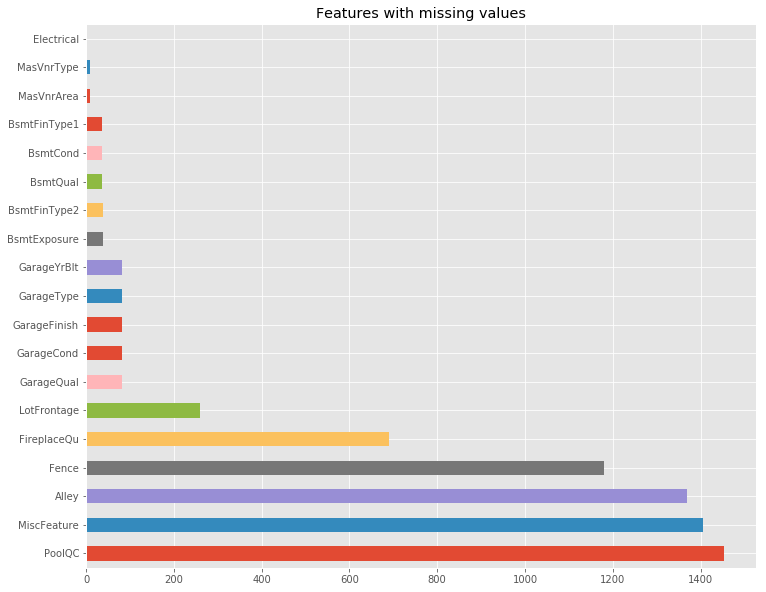

In [15]:
#Missingness
plt.figure(figsize=(12,10))
d=ames.isnull().sum().sort_values(ascending=False)
plt.title('Features with missing values')
d[0:19].plot.barh()

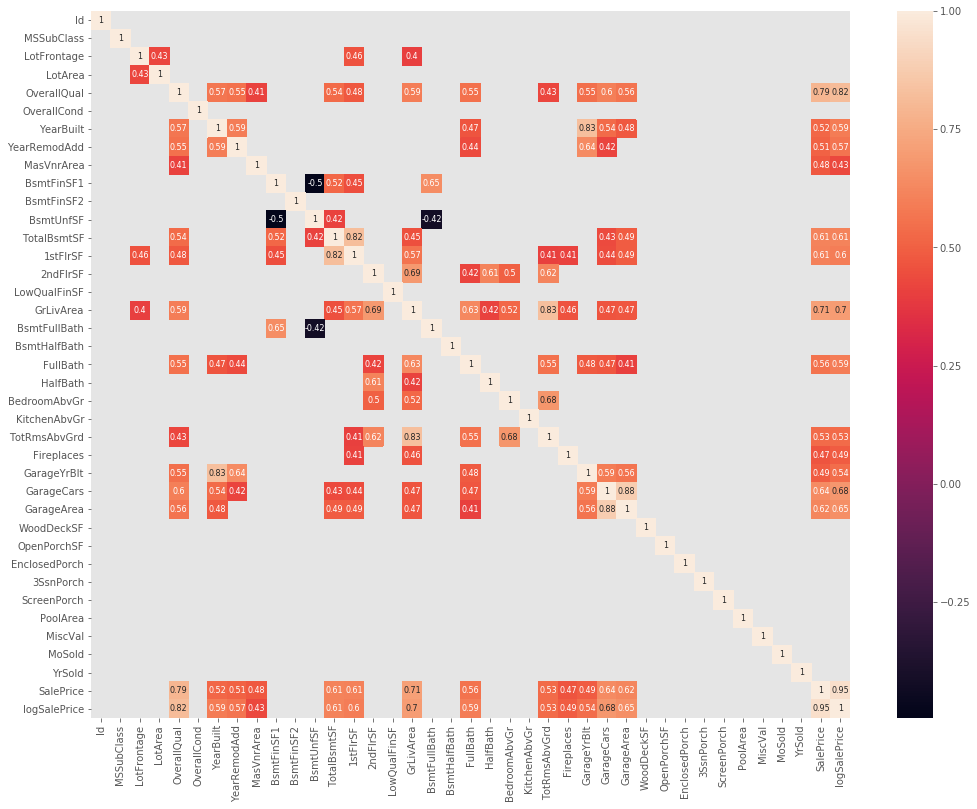

In [16]:
#Correlation heatmap
correlation = ames.corr(method='pearson')
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.4) | (correlation < -0.4)],  annot=True, annot_kws={"size": 8})

In [17]:
##skewness
skew_ = pd.DataFrame(ames.skew(), columns=["skew"])
ordered_skew = skew_[(skew_>1) | (skew_<-1)].dropna().sort_values(by='skew',ascending=False)
ordered_skew['feature'] = ordered_skew.index

Text(0.5, 0, 'Skewness')

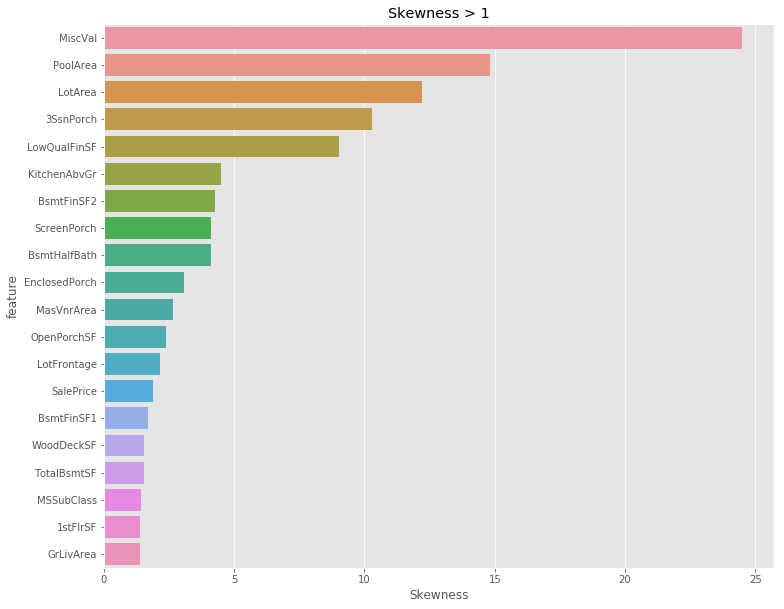

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(x='skew', y='feature', data=ordered_skew)
plt.title('Skewness > 1')
plt.xlabel('Skewness')